In [273]:
import cv2, os, sys
import pandas as pd
import json
import numpy as np
import random
from icecream import ic
from tqdm.auto import tqdm
import shutil as sh

from matplotlib import pyplot as plt 
from IPython.display import Image
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [274]:
root_directory = sys.path[0]
file_path = os.path.join(root_directory, 'Data', 'Annotations', 'annotated_functional_test3_fixed.json')

# data = pd.read_json(file_path)
with open(file_path) as json_data:
    data = json.load(json_data)

print('data type: ', type(data))
print('key: ', data.keys())
print('data_categories: ', data['categories'])
data['images']

data type:  <class 'dict'>
key:  dict_keys(['categories', 'images', 'annotations'])
data_categories:  [{'id': 1, 'name': 'damage'}]


[{'id': 7057517,
  'file_name': '8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-2f2d-40a9-9bcb-01ab8a93c7f5_DR80838_1630585604_1_26.jpeg',
  'width': 1920,
  'height': 1200},
 {'id': 7073954,
  'file_name': 'f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-2f2d-40a9-9bcb-01ab8a93c7f5_DR83966_1631797207_1_80.webp',
  'width': 1920,
  'height': 1200},
 {'id': 7074070,
  'file_name': 'f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-5f6b-4e9f-be25-f0cea53cd873_DR83966_1631797207_1_91.webp',
  'width': 1920,
  'height': 1200},
 {'id': 7062766,
  'file_name': 'b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-5f6b-4e9f-be25-f0cea53cd873_UN39385_1630572417_1_132.jpeg',
  'width': 1920,
  'height': 1200},
 {'id': 7060727,
  'file_name': 'aac64f05-470c-4182-8417-0587f1e83e43/858a0246-2f2d-40a9-9bcb-01ab8a93c7f5_DR80835_1630595417_1_68.jpeg',
  'width': 1920,
  'height': 1200},
 {'id': 7031758,
  'file_name': '228ec1ae-a904-4f7b-aa74-7cb51edc0c21/6bba1e27-aac2-47cb-8c30-fdcd83387a0d_SX11788_1630571458_0_6

## data_image

In [275]:
# data_images_key = list(data['images'][1].keys())
id_list = [i['id'] for i in data['images']]
file_name_list = [i['file_name'] for i in data['images']]
width_list = [i['width'] for i in data['images']]
height_list = [i['height'] for i in data['images']]

In [276]:
data_image = pd.DataFrame({'id':id_list,
                           'file_name':file_name_list,
                           'width':width_list, 
                           'height':height_list})
data_image

,id,file_name,width,height
0,7057517,8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-...,1920,1200
1,7073954,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200
2,7074070,f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-...,1920,1200
3,7062766,b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-...,1920,1200
4,7060727,aac64f05-470c-4182-8417-0587f1e83e43/858a0246-...,1920,1200
...,...,...,...,...
9580,8848,aac64f05-470c-4182-8417-0587f1e83e43/e84bd41d-...,1920,1200
9581,8849,794c8d9d-818a-4bc7-b373-467ec1a7ec7c/3eb0a10b-...,1920,1200
9582,8850,4e1a6d26-d867-4204-a6ef-b94f9104dab2/3ab29178-...,1920,1200
9583,8851,71b73ba5-c46e-4fb6-a26b-101226a2a99c/858a0246-...,1920,1200


In [277]:
data['annotations']

[{'segmentation': [[1050, 649, 1115, 649, 1115, 701, 1050, 701]],
  'bbox': [1050, 649, 65, 52],
  'iscrowd': 0,
  'id': 504548,
  'image_id': 7057517,
  'category_id': 1,
  'area': 3380},
 {'segmentation': [[1589, 534, 1615, 534, 1615, 571, 1589, 571]],
  'bbox': [1589, 534, 26, 37],
  'iscrowd': 0,
  'id': 504081,
  'image_id': 7073954,
  'category_id': 1,
  'area': 962},
 {'segmentation': [[1354, 453, 1390, 453, 1390, 480, 1354, 480]],
  'bbox': [1354, 453, 36, 27],
  'iscrowd': 0,
  'id': 504082,
  'image_id': 7073954,
  'category_id': 1,
  'area': 972},
 {'segmentation': [[902, 1084, 978, 1084, 978, 1141, 902, 1141]],
  'bbox': [902, 1084, 76, 57],
  'iscrowd': 0,
  'id': 504086,
  'image_id': 7074070,
  'category_id': 1,
  'area': 4332},
 {'segmentation': [[1324, 781, 1421, 781, 1421, 884, 1324, 884]],
  'bbox': [1324, 781, 97, 103],
  'iscrowd': 0,
  'id': 504658,
  'image_id': 7062766,
  'category_id': 1,
  'area': 9991},
 {'segmentation': [[1675, 907, 1919, 907, 1919, 1197, 16

## data_annotations 



In [278]:
segmentation_list = [i['segmentation'] for i in data['annotations']]
bbox_list = [i['bbox'] for i in data['annotations']]
iscrowd_list = [i['iscrowd'] for i in data['annotations']]
id_list = [i['id'] for i in data['annotations']]
image_id_list = [i['image_id'] for i in data['annotations']]
category_id_list = [i['category_id'] for i in data['annotations']]
area_list = [i['area'] for i in data['annotations']]

In [279]:
data_annotations = pd.DataFrame({'segmentation':segmentation_list,
                                 'bbox':bbox_list,
                                 'iscrowd':iscrowd_list, 
                                 'id':id_list, 
                                 'image_id':image_id_list, 
                                 'category_id':category_id_list, 
                                 'area':area_list})
data_annotations['segmentation'] = data_annotations.segmentation.apply(lambda x: x[0])
data_annotations

,segmentation,bbox,iscrowd,id,image_id,category_id,area
0,"[1050, 649, 1115, 649, 1115, 701, 1050, 701]","[1050, 649, 65, 52]",0,504548,7057517,1,3380
1,"[1589, 534, 1615, 534, 1615, 571, 1589, 571]","[1589, 534, 26, 37]",0,504081,7073954,1,962
2,"[1354, 453, 1390, 453, 1390, 480, 1354, 480]","[1354, 453, 36, 27]",0,504082,7073954,1,972
3,"[902, 1084, 978, 1084, 978, 1141, 902, 1141]","[902, 1084, 76, 57]",0,504086,7074070,1,4332
4,"[1324, 781, 1421, 781, 1421, 884, 1324, 884]","[1324, 781, 97, 103]",0,504658,7062766,1,9991
...,...,...,...,...,...,...,...
892,"[5, 683, 143, 683, 143, 796, 5, 796]","[5, 683, 138, 113]",0,504436,7044988,1,15594
893,"[0, 429, 300, 429, 300, 1069, 0, 1069]","[0, 429, 300, 640]",0,504309,7037292,1,192000
894,"[835, 641, 1296, 641, 1296, 1021, 835, 1021]","[835, 641, 461, 380]",0,504352,7038343,1,175180
895,"[152, 608, 705, 608, 705, 1180, 152, 1180]","[152, 608, 553, 572]",0,504353,7038343,1,316316


## add image name, width and height in data_annotations

In [280]:
# if all images in data_annotations exist image name in data_image
data_annotations[data_annotations.image_id.isin(data_image.id)] 

,segmentation,bbox,iscrowd,id,image_id,category_id,area
0,"[1050, 649, 1115, 649, 1115, 701, 1050, 701]","[1050, 649, 65, 52]",0,504548,7057517,1,3380
1,"[1589, 534, 1615, 534, 1615, 571, 1589, 571]","[1589, 534, 26, 37]",0,504081,7073954,1,962
2,"[1354, 453, 1390, 453, 1390, 480, 1354, 480]","[1354, 453, 36, 27]",0,504082,7073954,1,972
3,"[902, 1084, 978, 1084, 978, 1141, 902, 1141]","[902, 1084, 76, 57]",0,504086,7074070,1,4332
4,"[1324, 781, 1421, 781, 1421, 884, 1324, 884]","[1324, 781, 97, 103]",0,504658,7062766,1,9991
...,...,...,...,...,...,...,...
892,"[5, 683, 143, 683, 143, 796, 5, 796]","[5, 683, 138, 113]",0,504436,7044988,1,15594
893,"[0, 429, 300, 429, 300, 1069, 0, 1069]","[0, 429, 300, 640]",0,504309,7037292,1,192000
894,"[835, 641, 1296, 641, 1296, 1021, 835, 1021]","[835, 641, 461, 380]",0,504352,7038343,1,175180
895,"[152, 608, 705, 608, 705, 1180, 152, 1180]","[152, 608, 553, 572]",0,504353,7038343,1,316316


In [281]:
# no repetitive image id in data_image, one image has multiple boxes in data_annotations
print(f'If data_image has duplicat item?: {any(data_image.id.duplicated())}\nIf data_image has duplicat item?: {any(data_annotations.image_id.duplicated())}')
data_annotations[data_annotations.image_id.duplicated()]  

If data_image has duplicat item?: False
If data_image has duplicat item?: True


,segmentation,bbox,iscrowd,id,image_id,category_id,area
2,"[1354, 453, 1390, 453, 1390, 480, 1354, 480]","[1354, 453, 36, 27]",0,504082,7073954,1,972
17,"[243, 932, 275, 932, 275, 967, 243, 967]","[243, 932, 32, 35]",0,504301,7036543,1,1120
20,"[559, 860, 759, 860, 759, 1056, 559, 1056]","[559, 860, 200, 196]",0,504148,7026503,1,39200
34,"[289, 266, 583, 266, 583, 317, 289, 317]","[289, 266, 294, 51]",0,504094,7025381,1,14994
47,"[1329, 72, 1436, 72, 1436, 142, 1329, 142]","[1329, 72, 107, 70]",0,504285,7036076,1,7490
...,...,...,...,...,...,...,...
881,"[1629, 889, 1659, 889, 1659, 911, 1629, 911]","[1629, 889, 30, 22]",0,504349,7038335,1,660
882,"[1356, 898, 1373, 898, 1373, 920, 1356, 920]","[1356, 898, 17, 22]",0,504350,7038335,1,374
890,"[1011, 72, 1095, 72, 1095, 157, 1011, 157]","[1011, 72, 84, 85]",0,504808,7071010,1,7140
891,"[1025, 595, 1226, 595, 1226, 725, 1025, 725]","[1025, 595, 201, 130]",0,504809,7071010,1,26130


In [282]:
file_name = []
width = []
height = []
for i in data_annotations.image_id:
    fn = data_image[data_image.id.isin([i])].file_name.values  # <class 'numpy.ndarray'>
    file_name.append(''.join(fn))  # omit [''] 
    w = data_image[data_image.id.isin([i])].width.values 
    width.append(int(w))
    h = data_image[data_image.id.isin([i])].height.values
    height.append(int(h))

data_annotations['file_name'] = file_name
data_annotations['width'] = width
data_annotations['height'] = height

data_annotations

,segmentation,bbox,iscrowd,id,image_id,category_id,area,file_name,width,height
0,"[1050, 649, 1115, 649, 1115, 701, 1050, 701]","[1050, 649, 65, 52]",0,504548,7057517,1,3380,8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-...,1920,1200
1,"[1589, 534, 1615, 534, 1615, 571, 1589, 571]","[1589, 534, 26, 37]",0,504081,7073954,1,962,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200
2,"[1354, 453, 1390, 453, 1390, 480, 1354, 480]","[1354, 453, 36, 27]",0,504082,7073954,1,972,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200
3,"[902, 1084, 978, 1084, 978, 1141, 902, 1141]","[902, 1084, 76, 57]",0,504086,7074070,1,4332,f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-...,1920,1200
4,"[1324, 781, 1421, 781, 1421, 884, 1324, 884]","[1324, 781, 97, 103]",0,504658,7062766,1,9991,b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-...,1920,1200
...,...,...,...,...,...,...,...,...,...,...
892,"[5, 683, 143, 683, 143, 796, 5, 796]","[5, 683, 138, 113]",0,504436,7044988,1,15594,5acc593f-c057-46db-81e5-3d657ddeae6b/3ab29178-...,1920,1200
893,"[0, 429, 300, 429, 300, 1069, 0, 1069]","[0, 429, 300, 640]",0,504309,7037292,1,192000,39795355-5bde-47a1-8e5e-ec67b86801af/be80b6a0-...,1920,1200
894,"[835, 641, 1296, 641, 1296, 1021, 835, 1021]","[835, 641, 461, 380]",0,504352,7038343,1,175180,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200
895,"[152, 608, 705, 608, 705, 1180, 152, 1180]","[152, 608, 553, 572]",0,504353,7038343,1,316316,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200


In [283]:
data_annotations = data_annotations[['file_name', 'image_id', 'id', 'width', 'height', 'bbox', 'segmentation', 'area', 'iscrowd', 'category_id']]
data_annotations

,file_name,image_id,id,width,height,bbox,segmentation,area,iscrowd,category_id
0,8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-...,7057517,504548,1920,1200,"[1050, 649, 65, 52]","[1050, 649, 1115, 649, 1115, 701, 1050, 701]",3380,0,1
1,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,7073954,504081,1920,1200,"[1589, 534, 26, 37]","[1589, 534, 1615, 534, 1615, 571, 1589, 571]",962,0,1
2,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,7073954,504082,1920,1200,"[1354, 453, 36, 27]","[1354, 453, 1390, 453, 1390, 480, 1354, 480]",972,0,1
3,f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-...,7074070,504086,1920,1200,"[902, 1084, 76, 57]","[902, 1084, 978, 1084, 978, 1141, 902, 1141]",4332,0,1
4,b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-...,7062766,504658,1920,1200,"[1324, 781, 97, 103]","[1324, 781, 1421, 781, 1421, 884, 1324, 884]",9991,0,1
...,...,...,...,...,...,...,...,...,...,...
892,5acc593f-c057-46db-81e5-3d657ddeae6b/3ab29178-...,7044988,504436,1920,1200,"[5, 683, 138, 113]","[5, 683, 143, 683, 143, 796, 5, 796]",15594,0,1
893,39795355-5bde-47a1-8e5e-ec67b86801af/be80b6a0-...,7037292,504309,1920,1200,"[0, 429, 300, 640]","[0, 429, 300, 429, 300, 1069, 0, 1069]",192000,0,1
894,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,7038343,504352,1920,1200,"[835, 641, 461, 380]","[835, 641, 1296, 641, 1296, 1021, 835, 1021]",175180,0,1
895,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,7038343,504353,1920,1200,"[152, 608, 553, 572]","[152, 608, 705, 608, 705, 1180, 152, 1180]",316316,0,1


## extract bbox info for YOLO (not sure whether to do it)
you need get data_YOLO dataframe to run 'unsupervised learning part', no need to create train and validation folder

In [36]:
print('Are all values in \'height\' same?', all(data_annotations.height.duplicated(keep=False)))
print('Are all values in \'width\' same?', all(data_annotations.width.duplicated(keep=False)))
print('Are all values in \'category_id\' same?', all(data_annotations.category_id.duplicated(keep=False)))

Are all values in 'height' same? True
Are all values in 'width' same? True
Are all values in 'category_id' same? True


In [154]:
# build new yolo datafram
img_h, img_w, num_channels = (1200, 1920, 3)
data_YOLO = pd.DataFrame({})

# data normalization
data_YOLO['image_id'] = data_annotations.image_id
data_YOLO['x_center'] = data_annotations.bbox.apply(lambda x: x[0]+x[2]/2) / img_w
data_YOLO['y_center'] = data_annotations.bbox.apply(lambda x: x[1]+x[3]/2) / img_h
data_YOLO['width'] = data_annotations.bbox.apply(lambda x: x[2]) / img_w
data_YOLO['height'] = data_annotations.bbox.apply(lambda x: x[3]) / img_h
data_YOLO['category_id'] = data_annotations.category_id
data_YOLO

,image_id,x_center,y_center,width,height,category_id
0,7057517,0.563802,0.562500,0.033854,0.043333,1
1,7073954,0.834375,0.460417,0.013542,0.030833,1
2,7073954,0.714583,0.388750,0.018750,0.022500,1
3,7074070,0.489583,0.927083,0.039583,0.047500,1
4,7062766,0.714844,0.693750,0.050521,0.085833,1
...,...,...,...,...,...,...
892,7044988,0.038542,0.616250,0.071875,0.094167,1
893,7037292,0.078125,0.624167,0.156250,0.533333,1
894,7038343,0.554948,0.692500,0.240104,0.316667,1
895,7038343,0.223177,0.745000,0.288021,0.476667,1


### randomly sample one image and visualization

Image ID: 7027363
image path:  /Users/schnappiiii/Applied_Machine_Intelligence/project/Data/Images/098afaa9-7258-47ed-b7fa-87cefa56676d/e84bd41d-5f6b-4e9f-be25-f0cea53cd873_NF99688_1630581898_1_40.jpeg
img.shape:  (1200, 1920, 3)


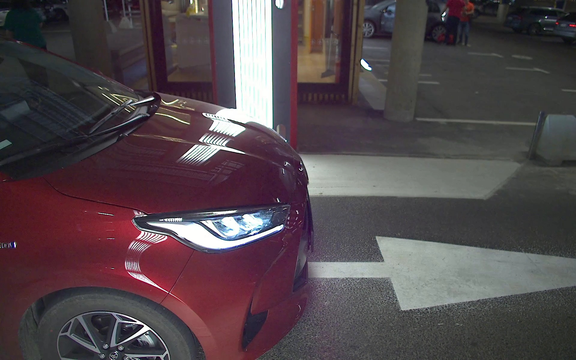

In [174]:
# based on image_id in data_YOLO get file_name in data_annotations
# index = list(set(data_YOLO.image_id))  # remove duplicated values
index = list(data_YOLO.image_id)  # remove duplicated values
image = random.choice(index)
print("Image ID:", image)

image = list(set(data_annotations[data_annotations.image_id.isin([image])].file_name))  # remove duplicated values
image = ''.join(image)

# get one image absolute path
Images_path = os.path.join(root_directory, 'Data', 'Images')
image = os.path.join(Images_path, str(image))

# visualize
img = cv2.imread(image)
print('image path: ', image)
print('img.shape: ', img.shape)
Image.open(image).resize((int(1920*0.3),int(1200*0.3)), Image.ANTIALIAS)
# im.show() 

### create train and validation folder of images and labels

In [236]:
fold = 0
val_index = index[len(index)*fold//5 : len(index)*(fold+1)//5]  # k-fold, 20% validation data
for name, mini in tqdm(data_YOLO.groupby('image_id')):  # write the information of duplicated image_id in one txt, name: image_id, mini: one row of data_YOLO
    if name in val_index:
        path2save = 'validation'
    else:
        path2save = 'train'
    
    # build label path and add .txt files
    label_path = os.path.join(root_directory, 'data_YOLO', 'labels', path2save)
    if not os.path.exists(label_path):
        os.makedirs(label_path)
    with open(os.path.join(label_path, str(name)+'.txt'), 'w+') as f:
        row = mini[['category_id','x_center','y_center','width','height']].astype(float).values
        row = row.astype(str)
        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")

    # build image path and add images
    image_path = os.path.join(root_directory, 'data_YOLO', 'images', path2save)
    if not os.path.exists(image_path):
        os.makedirs(image_path)

    tmp = data_annotations[data_annotations.image_id.isin([name])].file_name
    i_p = ' '.join(set(tmp))  # omit duplicated file name, '../...jpeg'
    img_path = os.path.join(root_directory, 'Data', 'Images', i_p)  # original data path
    tmp = ''.join(tmp.to_list())
    format_ = '.'+tmp.split('.')[-1]  # image format
    sh.copy(img_path, os.path.join(image_path, str(name)+format_))


100%|██████████| 732/732 [00:01<00:00, 432.96it/s]


## image to array in image annotation (so big don't run this)

In [90]:
subfolder_img_name = data_annotations.file_name.tolist()
img_list=[]
for i in subfolder_img_name:
    img_path = os.path.join(root_directory, 'Data', 'Images', str(i))
    img = cv2.imread(img_path)  
    img_list.append(img)

data_annotations['array_img'] = img_list
data_annotations

,segmentation,bbox,iscrowd,id,image_id,category_id,area_list,file_name,width,height,array_img
0,"[[1050, 649, 1115, 649, 1115, 701, 1050, 701]]","[1050, 649, 65, 52]",0,504548,7057517,1,3380,8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-...,1920,1200,"[[[124, 93, 108], [130, 100, 113], [138, 108, ..."
1,"[[1589, 534, 1615, 534, 1615, 571, 1589, 571]]","[1589, 534, 26, 37]",0,504081,7073954,1,962,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200,"[[[105, 99, 97], [119, 109, 111], [123, 110, 1..."
2,"[[1354, 453, 1390, 453, 1390, 480, 1354, 480]]","[1354, 453, 36, 27]",0,504082,7073954,1,972,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200,"[[[105, 99, 97], [119, 109, 111], [123, 110, 1..."
3,"[[902, 1084, 978, 1084, 978, 1141, 902, 1141]]","[902, 1084, 76, 57]",0,504086,7074070,1,4332,f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-...,1920,1200,"[[[25, 17, 20], [29, 21, 25], [34, 26, 30], [3..."
4,"[[1324, 781, 1421, 781, 1421, 884, 1324, 884]]","[1324, 781, 97, 103]",0,504658,7062766,1,9991,b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-...,1920,1200,"[[[17, 3, 5], [15, 1, 3], [16, 2, 4], [14, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...
892,"[[5, 683, 143, 683, 143, 796, 5, 796]]","[5, 683, 138, 113]",0,504436,7044988,1,15594,5acc593f-c057-46db-81e5-3d657ddeae6b/3ab29178-...,1920,1200,"[[[6, 13, 10], [6, 13, 10], [6, 13, 10], [7, 1..."
893,"[[0, 429, 300, 429, 300, 1069, 0, 1069]]","[0, 429, 300, 640]",0,504309,7037292,1,192000,39795355-5bde-47a1-8e5e-ec67b86801af/be80b6a0-...,1920,1200,"[[[33, 34, 30], [35, 36, 32], [37, 38, 34], [3..."
894,"[[835, 641, 1296, 641, 1296, 1021, 835, 1021]]","[835, 641, 461, 380]",0,504352,7038343,1,175180,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200,"[[[47, 48, 46], [49, 47, 46], [49, 47, 46], [4..."
895,"[[152, 608, 705, 608, 705, 1180, 152, 1180]]","[152, 608, 553, 572]",0,504353,7038343,1,316316,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200,"[[[47, 48, 46], [49, 47, 46], [49, 47, 46], [4..."


In [93]:
# def show(name, img):
#     cv2.imshow(name, img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     cv2.waitKey(1)
# data_annotations.array_img[0]
# # show('image',img_list[1])
# show('image', data_annotations.array_img[0])

In [94]:
X = data_annotations.array_img
y = data_annotations.bbox


## get unlabeled images (so big don't run this)

In [237]:
# get each image's subfolder + image name in Data/Images
img_path_root = os.path.join(root_directory, 'Data', 'Images')
subfolder = []
img_name = []
root_img_name = []
Images_subfolder_img_name = []

def walkFile(file):
    for root, dirs, files in os.walk(file):
       # traverse file
        for f in files:
            img_name.append(f)  # just image name
            r = os.path.join(root, f)  # entire image path
            root_img_name.append(r)
            
        # traverse subfolder
        for d in dirs:
            subfolder.append(d)
            
    return root_img_name, subfolder, img_name

root_img_name, subfolder, img_name = walkFile(img_path_root)

del(root_img_name[0])  # delete '.DS_Store'

Images_subfolder_img_name = []
for i in root_img_name:
    split_root_img_name = i.split('/')
    temp = os.path.join(split_root_img_name[-2], split_root_img_name[-1])  # subfolder + image name 
    Images_subfolder_img_name.append(temp)

print('the number of all images', len(Images_subfolder_img_name))

the number of all images 51259


'b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-5f6b-4e9f-be25-f0cea53cd873_UN39385_1630572417_1_146.webp'

In [136]:
# find images that have no annotation
img_sub_name = pd.DataFrame({'Images_subfolder_img_name':Images_subfolder_img_name})
no_bbbox_img = img_sub_name[~img_sub_name.Images_subfolder_img_name.isin(data_annotations.file_name)]  # 732 not 897, since data_annotations has replicated image
print('the number of images that have no annotation:', len(no_bbbox_img))

the number of images that have no annotation 50527


In [138]:
# images to array in no annotation images
no_bbbox_img_path = img_sub_name.Images_subfolder_img_name.values  #.tolist()
no_bbbox_img_list=[]
for i in no_bbbox_img_path:
    img_path = os.path.join(root_directory, 'Data', 'Images', str(i))
    img = cv2.imread(img_path)  
    no_bbbox_img_list.append(img)

no_bbbox_img['array_no_bbbox_img'] = no_bbbox_img_list
no_bbbox_img

: 

: 

## unsupervised learning (build folder bbox_image that include annotated/damage image)

### Autoencoder

In [239]:
data_YOLO

,image_id,x_center,y_center,width,height,category_id
0,7057517,0.563802,0.562500,0.033854,0.043333,1
1,7073954,0.834375,0.460417,0.013542,0.030833,1
2,7073954,0.714583,0.388750,0.018750,0.022500,1
3,7074070,0.489583,0.927083,0.039583,0.047500,1
4,7062766,0.714844,0.693750,0.050521,0.085833,1
...,...,...,...,...,...,...
892,7044988,0.038542,0.616250,0.071875,0.094167,1
893,7037292,0.078125,0.624167,0.156250,0.533333,1
894,7038343,0.554948,0.692500,0.240104,0.316667,1
895,7038343,0.223177,0.745000,0.288021,0.476667,1


In [269]:
data_YOLO_class = pd.DataFrame({})
data_YOLO_class['image_id'] = data_annotations.image_id
data_YOLO_class['x_min'] = data_annotations.segmentation.apply(lambda x: x[0]) 
data_YOLO_class['y_min'] = data_annotations.segmentation.apply(lambda x: x[1]) 
data_YOLO_class['x_max'] = data_annotations.segmentation.apply(lambda x: x[4]) 
data_YOLO_class['y_max'] = data_annotations.segmentation.apply(lambda x: x[5]) 
data_YOLO_class

,image_id,x_min,y_min,x_max,y_max
0,7057517,1050,649,1115,701
1,7073954,1589,534,1615,571
2,7073954,1354,453,1390,480
3,7074070,902,1084,978,1141
4,7062766,1324,781,1421,884
...,...,...,...,...,...
892,7044988,5,683,143,796
893,7037292,0,429,300,1069
894,7038343,835,641,1296,1021
895,7038343,152,608,705,1180


In [266]:
fold = 0
val_index = index[len(index)*fold//5 : len(index)*(fold+1)//5]  # k-fold, 20% validation data
for name, mini in tqdm(data_YOLO.groupby('image_id')):  # write the information of duplicated image_id in one txt, name: image_id, mini: one row of data_YOLO
    if name in val_index:
        path2save = 'validation'
    else:
        path2save = 'train'
    
    # build label path and add .txt files
    label_path = os.path.join(root_directory, 'data_YOLO', 'labels', path2save)
    if not os.path.exists(label_path):
        os.makedirs(label_path)
    with open(os.path.join(label_path, str(name)+'.txt'), 'w+') as f:
        row = mini[['category_id','x_center','y_center','width','height']].astype(float).values
        row = row.astype(str)
        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")

    # build image path and add images
    image_path = os.path.join(root_directory, 'data_YOLO', 'images', path2save)
    if not os.path.exists(image_path):
        os.makedirs(image_path)

    tmp = data_annotations[data_annotations.image_id.isin([name])].file_name
    i_p = ' '.join(set(tmp))  # omit duplicated file name, '../...jpeg'
    img_path = os.path.join(root_directory, 'Data', 'Images', i_p)  # original data path
    tmp = ''.join(tmp.to_list())
    format_ = '.'+tmp.split('.')[-1]  # image format
    sh.copy(img_path, os.path.join(image_path, str(name)+format_))


,segmentation,bbox,iscrowd,id,image_id,category_id,area,file_name,width,height,b
0,"[[1050, 649, 1115, 649, 1115, 701, 1050, 701]]","[1050, 649, 65, 52]",0,504548,7057517,1,3380,8f27c5f1-3ea3-4392-9bc8-585c76057cd1/858a0246-...,1920,1200,"[1050, 649, 1115, 649, 1115, 701, 1050, 701]"
1,"[[1589, 534, 1615, 534, 1615, 571, 1589, 571]]","[1589, 534, 26, 37]",0,504081,7073954,1,962,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200,"[1589, 534, 1615, 534, 1615, 571, 1589, 571]"
2,"[[1354, 453, 1390, 453, 1390, 480, 1354, 480]]","[1354, 453, 36, 27]",0,504082,7073954,1,972,f58a99ab-350a-41df-8dbf-889326378c4a/858a0246-...,1920,1200,"[1354, 453, 1390, 453, 1390, 480, 1354, 480]"
3,"[[902, 1084, 978, 1084, 978, 1141, 902, 1141]]","[902, 1084, 76, 57]",0,504086,7074070,1,4332,f58a99ab-350a-41df-8dbf-889326378c4a/e84bd41d-...,1920,1200,"[902, 1084, 978, 1084, 978, 1141, 902, 1141]"
4,"[[1324, 781, 1421, 781, 1421, 884, 1324, 884]]","[1324, 781, 97, 103]",0,504658,7062766,1,9991,b44a2093-2861-402b-96bd-23cac6359b94/e84bd41d-...,1920,1200,"[1324, 781, 1421, 781, 1421, 884, 1324, 884]"
...,...,...,...,...,...,...,...,...,...,...,...
892,"[[5, 683, 143, 683, 143, 796, 5, 796]]","[5, 683, 138, 113]",0,504436,7044988,1,15594,5acc593f-c057-46db-81e5-3d657ddeae6b/3ab29178-...,1920,1200,"[5, 683, 143, 683, 143, 796, 5, 796]"
893,"[[0, 429, 300, 429, 300, 1069, 0, 1069]]","[0, 429, 300, 640]",0,504309,7037292,1,192000,39795355-5bde-47a1-8e5e-ec67b86801af/be80b6a0-...,1920,1200,"[0, 429, 300, 429, 300, 1069, 0, 1069]"
894,"[[835, 641, 1296, 641, 1296, 1021, 835, 1021]]","[835, 641, 461, 380]",0,504352,7038343,1,175180,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200,"[835, 641, 1296, 641, 1296, 1021, 835, 1021]"
895,"[[152, 608, 705, 608, 705, 1180, 152, 1180]]","[152, 608, 553, 572]",0,504353,7038343,1,316316,3e194ab1-9afa-4b28-aab4-48216990b6d6/fe18c3ff-...,1920,1200,"[152, 608, 705, 608, 705, 1180, 152, 1180]"


In [327]:
# build bbox_image path
bbox_image_path = os.path.join(root_directory, 'data_YOLO', 'bbox_image')
if not os.path.exists(bbox_image_path):
    os.makedirs(bbox_image_path)

for i in index:
    tmp = data_annotations[data_annotations.image_id.isin([i])].file_name
    i_p = ' '.join(set(tmp))  # omit duplicated file name, '../...jpeg'
    img_path = os.path.join(root_directory, 'Data', 'Images', i_p)  # original data path
    file, ext = os.path.splitext(img_path)  # ('c:\\csv\\test', '.csv')

    im = Image.open(img_path)
    # Cropped image (It will not change orginal image) 
    one_row = data_YOLO_class[data_YOLO_class.image_id.isin([i])]
    if one_row.shape[0] is not 1:
        # for j, k in enumerate(one_row.shape[0]):
        for j in range(one_row.shape[0]):
            n = one_row.iloc[j,:]
            im_ = im.crop((n.x_min, n.y_min, n.x_max, n.y_max)) 
            im_.save(os.path.join(bbox_image_path, 'bbox_'+str(i)+'_'+str(j)+ext))  # , quality=95   
    else:
        im_ = im.crop((one_row.x_min, one_row.y_min, one_row.x_max, one_row.y_max)) 
        im_.save(os.path.join(bbox_image_path, 'bbox_'+str(i)+ext))  # , quality=95